In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8,8]

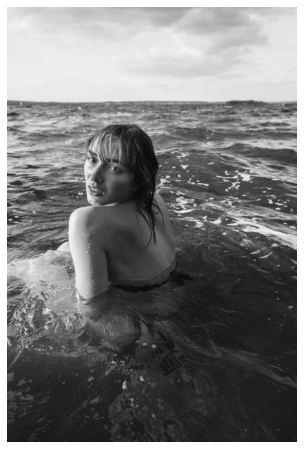

In [2]:
# reading and importing the image
img = imread('./sample2.jpg')
img = np.mean(img,-1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

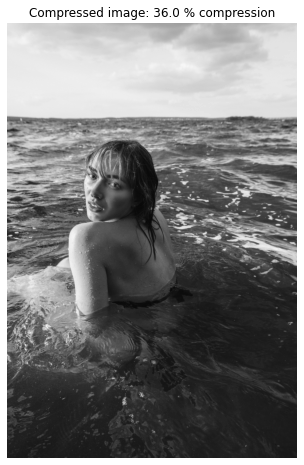

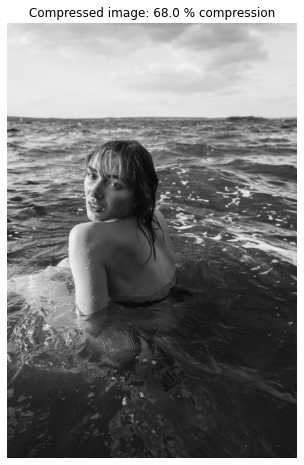

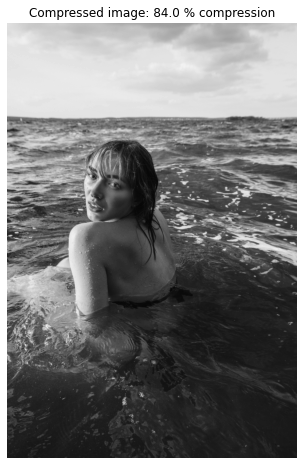

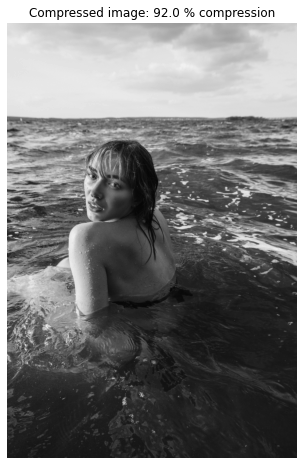

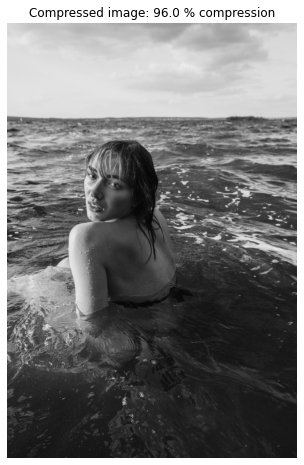

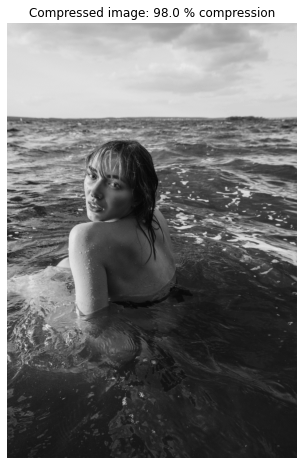

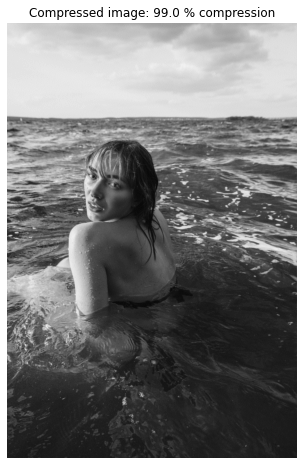

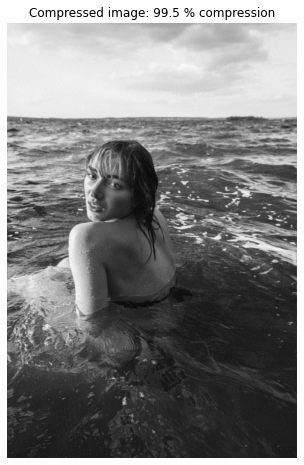

In [15]:
img_fft = np.fft.fft2(img)
linear_img = np.sort(np.abs(np.reshape(img_fft,-1)))[::-1]

keep = [0.64, 0.32, 0.16, 0.08, 0.04, 0.02, 0.01,0.005]
compressed_images = list()
for k in keep:
    threshold = np.floor(len(linear_img)*k) - 1
    mask = np.abs(img_fft) > linear_img[int(threshold)]
    compressed_img = np.real(np.fft.ifft2(img_fft * mask))
    compressed_images.append(compressed_img)
    plt.imshow(compressed_img,cmap='gray')
    plt.title(f'Compressed image: {str(100 - k*100)} % compression')
    plt.axis('off')
    plt.show()

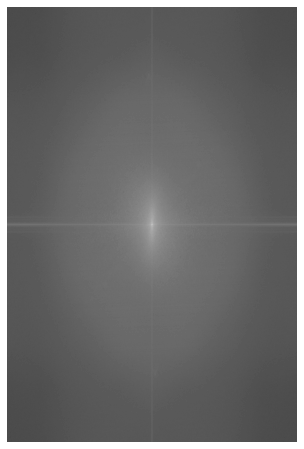

In [16]:
# the fourier transform pattern 
plt.imshow(np.log(np.abs(np.fft.fftshift(img_fft))),cmap='gray')
plt.axis('off')
plt.show()

In [17]:
plt.imsave('./compressed_girl.jpg',compressed_images[-1], cmap=plt.cm.gray)
plt.imsave('./girl.jpg',img, cmap=plt.cm.gray)

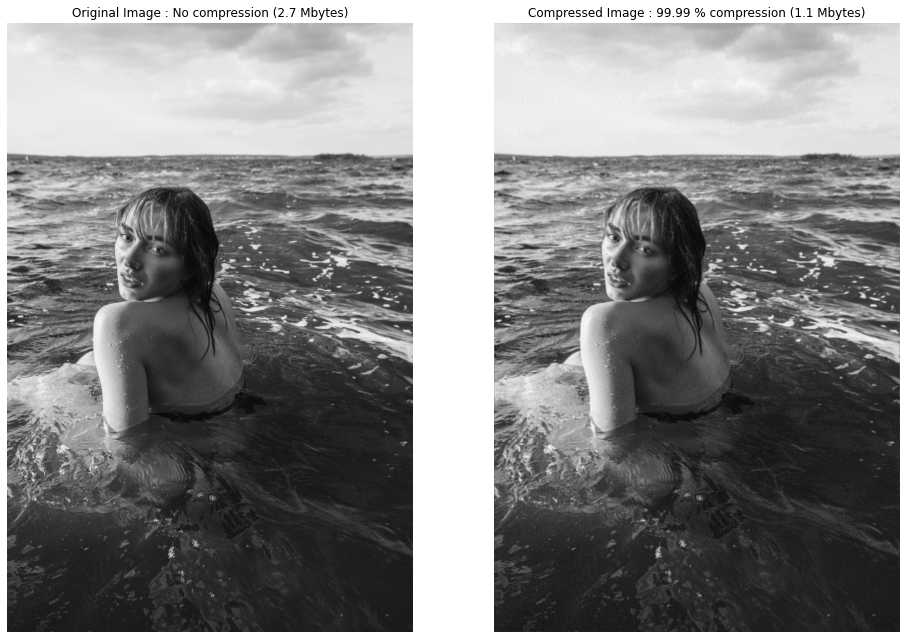

In [20]:
image_datas = [imread('girl.jpg'), imread('compressed_girl.jpg')]
_, axarr = plt.subplots(1,2,figsize=(16,16))


axarr[0].imshow(image_datas[0])
axarr[0].set_title('Original Image : No compression (2.7 Mbytes)')
axarr[0].axis('off')

axarr[1].imshow(image_datas[1])
axarr[1].set_title('Compressed Image : 99.99 % compression (1.1 Mbytes)')
axarr[1].axis('off')


plt.show()
